# COCO Dataset Exploration Notebook

This notebook allows for exploration of the COCO dataset annotations, displaying segmentation masks and examining depth ordering for selected images.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from PIL import Image


In [2]:
# Load COCO annotations
annotation_file = 'annotations/val-annotations.json'  # Adjust the path as needed
coco = COCO(annotation_file)


loading annotations into memory...
Done (t=0.49s)
creating index...
index created!


In [3]:

def mask_to_contour(mask):
    """
    Convert a binary mask to a contour.
    This function finds the contours of the binary mask using the 'findContours' function from OpenCV.
    """
    import cv2
    # Convert the mask to uint8
    mask = mask.astype('uint8')
    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Choose the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    return largest_contour.reshape(-1, 2)

In [4]:
# Define function to display images with segmentation masks
import random
import os
def display_image_with_masks(image_id):
    # Load the image
    image_info = coco.loadImgs(image_id)[0]
    image_path = './data/images/val/' + image_info['file_name']  # Adjust path as needed
    image = Image.open(image_path).convert('RGB')
    plt.clf()
    # Load and display masks
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()
    
    # Plot each mask and bounding box
    annIds = coco.getAnnIds(imgIds=image_info['id'], iscrowd=None)
    anns = coco.loadAnns(annIds)
    print(len(anns))
    for ann in anns[:10]: #show first 10 annotations
        coco.showAnns(anns)
    plt.axis('off')
    plt.show()
    plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
    plt.imshow(image)
    plt.axis('off')
    
def display_image_with_bbox(image_id):
    # Load the image
    image_info = coco.loadImgs(image_id)[0]
    image_path = './data/images/val/' + image_info['file_name']  # Adjust path as needed
    image = Image.open(image_path).convert('RGB')
    plt.clf()
    # Load and display masks
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()
    
    # Plot each mask and bounding box
    annIds = coco.getAnnIds(imgIds=image_info['id'], iscrowd=None)
    anns = coco.loadAnns(annIds)
    print(len(anns))
    for ann in anns: 
#         Draw bounding box
        bbox = ann['bbox']
        rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
    
    plt.axis('off')
    plt.show()
    plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
    plt.imshow(image)
    plt.axis('off')
# Function to visualize intra-depth on segmentation masks
def visualize_depth_on_masks(imgId, coco, img_dir, depth_type="Intradepth"):
    img = coco.loadImgs(imgId)[0]

    # Load image
    image = Image.open(os.path.join(img_dir, img['file_name']))
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')

    # Load annotations for the image
    annIds = coco.getAnnIds(imgIds=img['id'])
    anns = coco.loadAnns(annIds)

    # Create an empty mask for visualization
    mask = np.zeros((img['height'], img['width']))

    # Overlay masks with intra-depth values
    for ann in anns:
        if len(ann["segmentation"])==0:
               continue
        attributes = ann.get('attributes', {})
        intradepth = attributes.get(depth_type, 1.0)
        seg_mask = coco.annToMask(ann)
        mask += seg_mask * intradepth

    # Normalize the mask to range [0, 1] for visualization
    mask = mask / np.max(mask)

    # Create a grayscale colormap
    plt.imshow(mask, cmap='gray', alpha=0.95)
    plt.show()    

256


<Figure size 640x480 with 0 Axes>

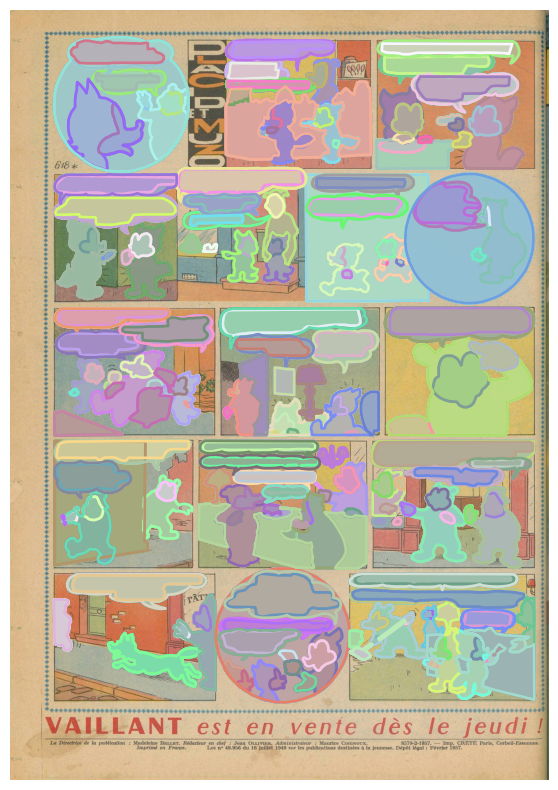

256


<Figure size 1000x1000 with 0 Axes>

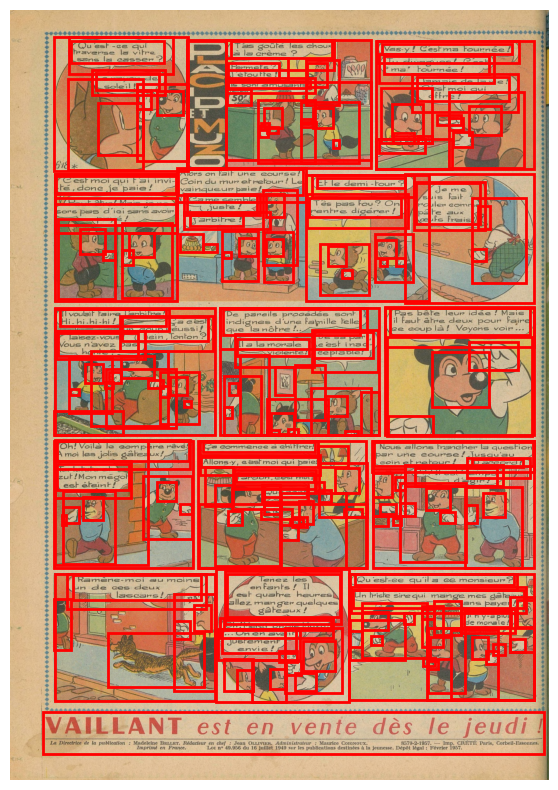

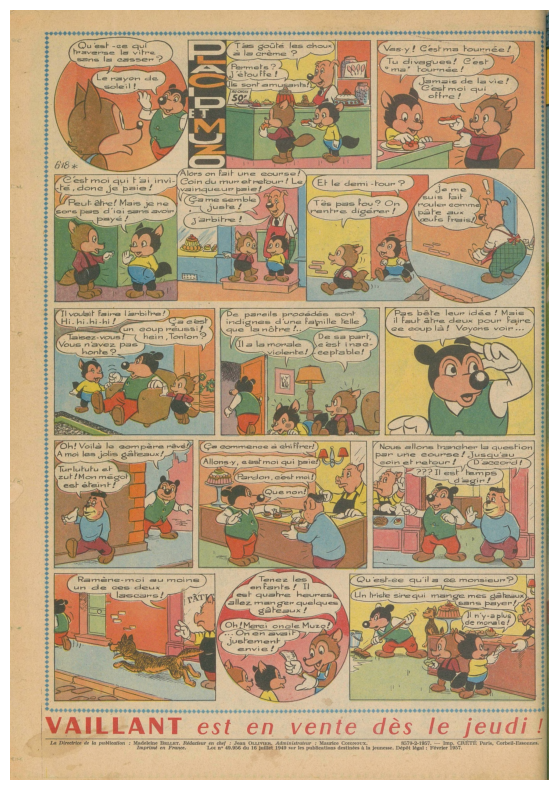

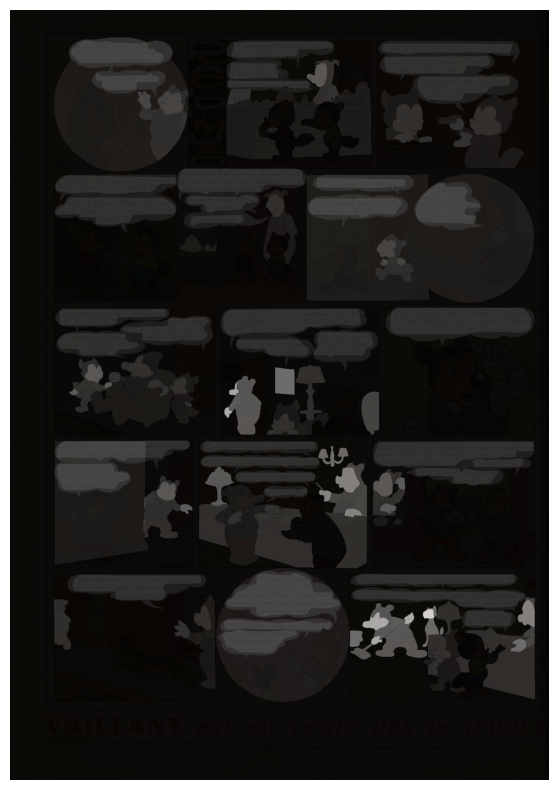

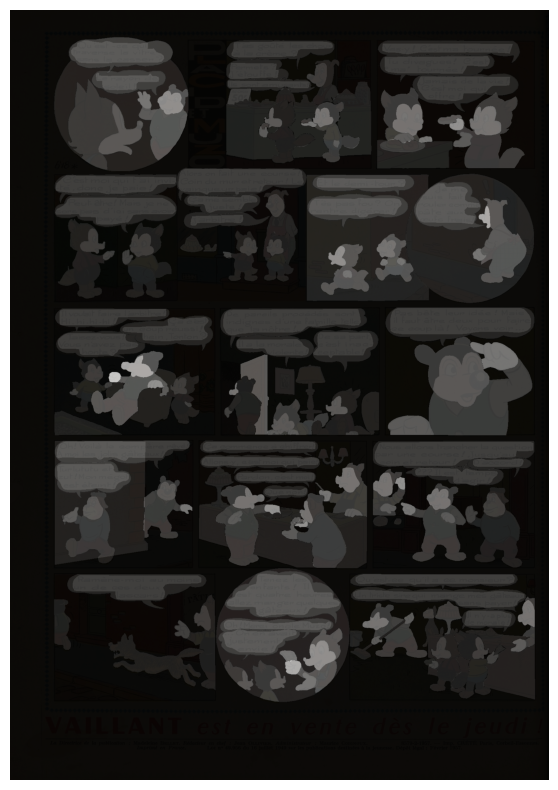

In [5]:
# Display images with their masks (This might take about 30 seconds)

# Select a random image
imgIds = coco.getImgIds()
imgId = random.choice(imgIds)
image_ids = [imgId]

# OR Enter specific image IDs to view
#image_ids = [134]  # Replace these IDs with actual image IDs from the dataset
for image_id in image_ids:
    display_image_with_masks(image_id)
    display_image_with_bbox(image_id)
    visualize_depth_on_masks(image_id,coco,"./data/images/val/", "Interdepth")
    visualize_depth_on_masks(image_id, coco,"./data/images/val/", "Intradepth")
    

